# Exploding Flow Experiment

This is the main notebook for investigating the variation in time of the flow matching flows. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.flow import Flowmodel
from train import train_flow
import torch
import torch.nn as nn
from utils.visualize import visualize_flow_evolution
from datasets.synthetic import sample_dataset, draw_compare
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Dataset Specification 

Select and sample from a data distribution. Can be among ```swiss_roll```, ```moons```, or ```manual```.

For the ```manual``` selection, can upload your own greyscale image in ```datasets/images```.

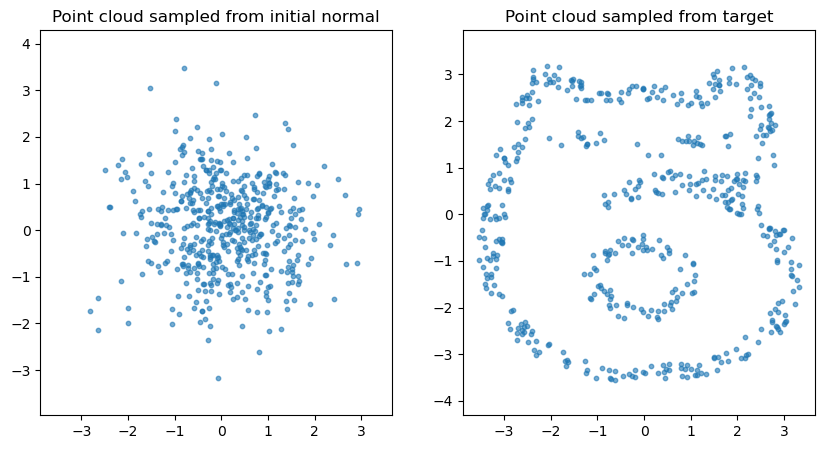

In [6]:
dataset = 'manual' 
filename = 'num6cat.jpg'
n_samples = 512
noise = 0.05
scale = 2
x1 = sample_dataset(n_samples, noise, scale, dataset, filename)
draw_compare(x1)

### Train Flow Model

In [59]:
flow_model = train_flow(dataset, filename, n_samples, noise, scale, n_iters=5000)

Step 0, Loss: 5.171804428100586
Step 1000, Loss: 2.8366541862487793
Step 2000, Loss: 2.8987722396850586
Step 3000, Loss: 2.9266912937164307
Step 4000, Loss: 3.0172178745269775


### Sample From Flow

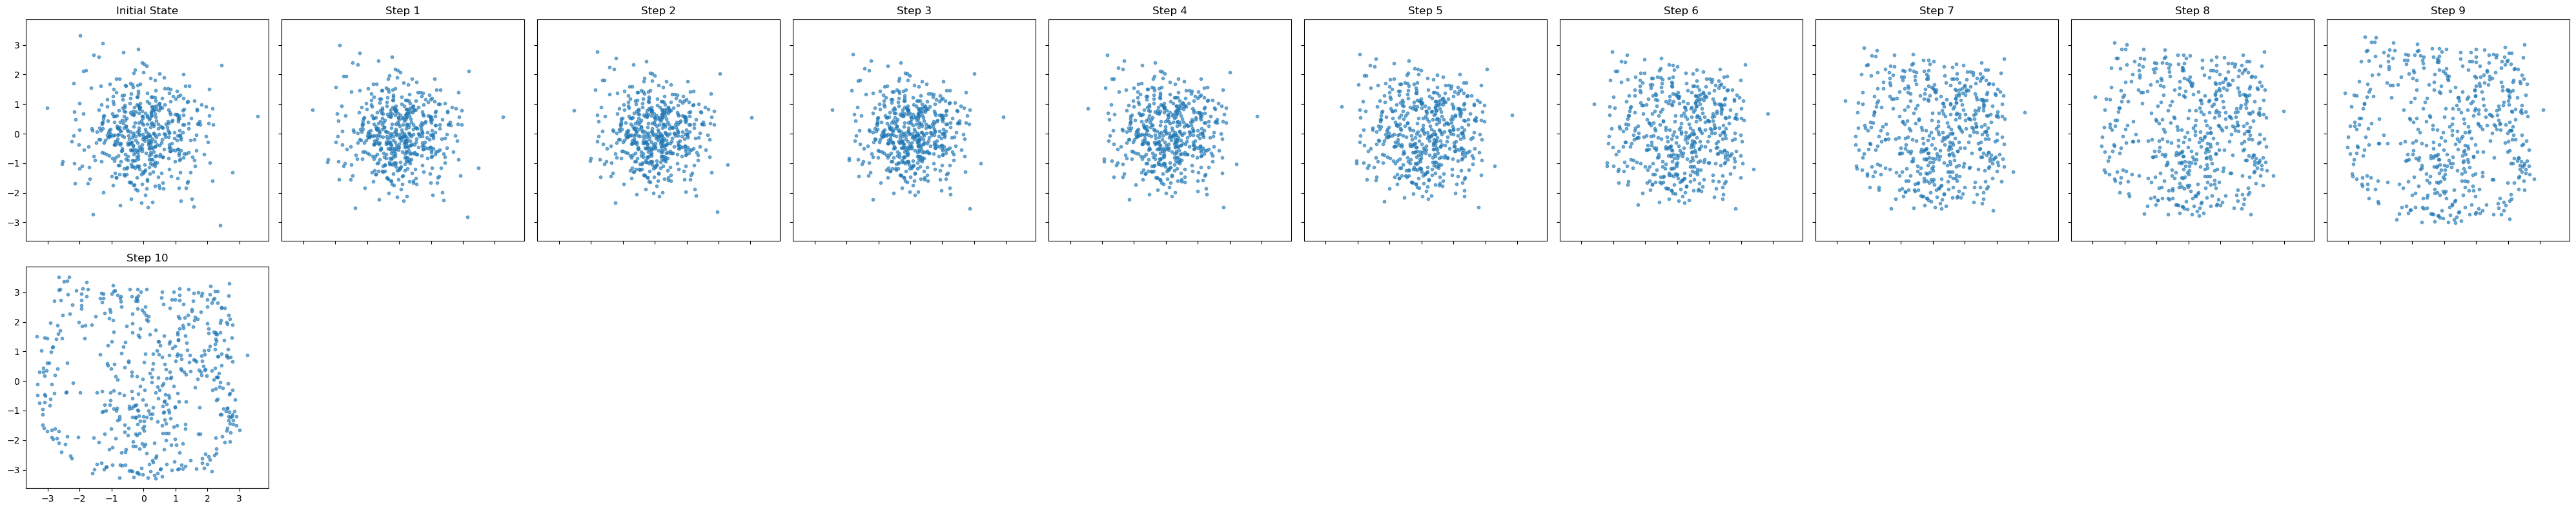

In [61]:
from utils.visualize import visualize_flow_evolution

x0 = torch.randn(n_samples, 2)
visualize_flow_evolution(flow_model, x0, n_steps=10, xlim=(-5,10), ylim=(-4,6))

### Visualize the variance in the flow

Plotted below are several statistics for the flow
* Blue curve on left: Mean vector length at time $t$.
* Orange curve on left: Std Vector length at time $t$.
* Blue curve on right: Mean divergence of the field at time $t$.
* Orange curve on right: Mean curl of the field at time $t$.

The flow for distribution manual, with filename num6cat.jpg, has the following statistics:


100%|██████████| 20/20 [00:00<00:00, 685.78it/s]


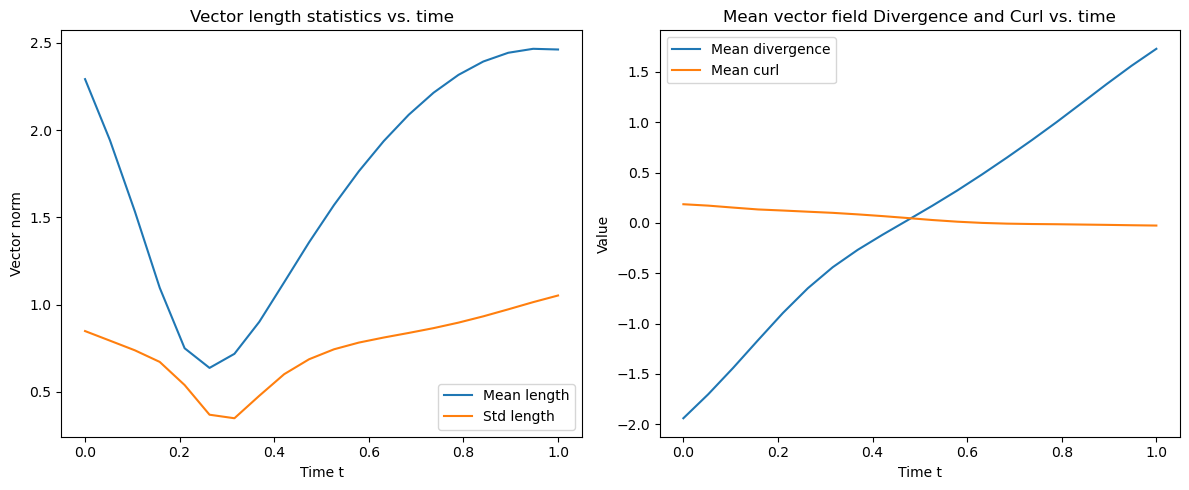

In [62]:
from utils.flow_analysis import analyze_flow_over_time

print(f"The flow for distribution {dataset}, with filename {filename}, has the following statistics:")
analyze_flow_over_time(flow_model, (-3,3), (-3,3), (64,64) , time_steps=20)